### Data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from LabelTrans_Regression import label_transform

images_npy = '../Datasets/images.npy'
labels_npy = '../Datasets/labels.npy'
images = np.load(images_npy)
labels = np.load(labels_npy)

[0 0]


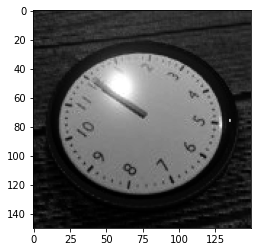

In [32]:
print(labels[0])

gamma_transfer = exposure.adjust_gamma(images[0], 3)

plt.imshow(gamma_transfer, cmap ='gray')



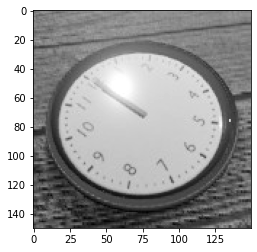

In [30]:
plt.imshow(images[0], cmap ='gray')

In [2]:

enhance_images = exposure.adjust_gamma(images, 3)

---

### Basic Model Shape

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, BatchNormalization
from keras import backend
import tensorflow as tf
import keras

model = Sequential()
model.add(Input(shape=(150, 150, 1)))
model.add(Conv2D(filters=32,
                    kernel_size=(3, 3),
                    activation='relu',
                    kernel_regularizer='l2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,
                    kernel_size=(3, 3),
                    activation='relu',
                    kernel_regularizer='l2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=128,
                    kernel_size=(3, 3),
                    activation='relu',
                    kernel_regularizer='l2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=256,
                activation='relu',
                kernel_regularizer='l2'))
model.add(Dense(units=128,
                activation='relu',
                kernel_regularizer='l2'))
model.add(Dense(units=1, activation='linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 74, 74, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)      

---

### Regression

In [3]:
# Enhance
import numpy as np
from sklearn.model_selection import train_test_split
from Regression import regression, preprocessing
import matplotlib.pyplot as plt

batch_size = 32
epochs = 100
lr = 0.001

images_npy = '../Datasets/images.npy'
labels_npy = '../Datasets/labels.npy'
# images = np.load(images_npy)
images = enhance_images
labels = np.load(labels_npy)

x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=0.8)
x_train, x_test, input_shape = preprocessing(x_train, x_test)
y_train = y_train[:, 0] + y_train[:, 1] / 60  # single output labels
y_test = y_test[:, 0] + y_test[:, 1] / 60

regression_history, regression_his = regression(x_train, y_train, x_test, y_test, batch_size, epochs, lr, input_shape)

Epoch 1/100
450/450 [==============================] - 12s 20ms/step - loss: 7.2388 - custom_mae: 4.4363 - val_loss: 5.9998 - val_custom_mae: 2.9482
Epoch 2/100
450/450 [==============================] - 9s 19ms/step - loss: 4.2582 - custom_mae: 3.1964 - val_loss: 3.4427 - val_custom_mae: 2.1122
Epoch 3/100
450/450 [==============================] - 8s 19ms/step - loss: 2.9965 - custom_mae: 2.5723 - val_loss: 2.6798 - val_custom_mae: 2.0236
Epoch 4/100
450/450 [==============================] - 8s 19ms/step - loss: 2.5197 - custom_mae: 2.3809 - val_loss: 2.3622 - val_custom_mae: 1.4714
Epoch 5/100
450/450 [==============================] - 8s 19ms/step - loss: 2.2474 - custom_mae: 2.2528 - val_loss: 3.1244 - val_custom_mae: 2.2940
Epoch 6/100
450/450 [==============================] - 8s 19ms/step - loss: 2.0906 - custom_mae: 2.1929 - val_loss: 2.1676 - val_custom_mae: 1.9795
Epoch 7/100
450/450 [==============================] - 8s 19ms/step - loss: 1.9387 - custom_mae: 2.1570 - val_l

In [4]:
regression_x_test, regression_y_test = x_test, y_test

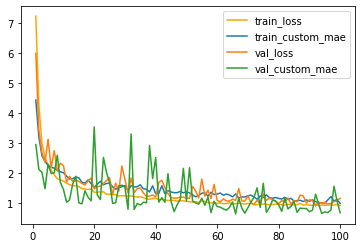

In [5]:
# Training plot with enhance
train_loss = regression_his.history['loss']
train_mse = regression_his.history['custom_mae']
val_loss = regression_his.history['val_loss']
val_mse = regression_his.history['val_custom_mae']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'orange', label='train_loss')
plt.plot(epochs, train_mse, label='train_custom_mae')
plt.plot(epochs, val_loss, label='val_loss')
plt.plot(epochs, val_mse, label='val_custom_mae')
plt.legend()
plt.show()

In [18]:
regression_pred = regression_history.predict(x_test)
print('min predict:', np.min(regression_pred), 'max predict:', np.max(regression_pred))
print("y_predict", '   ', 'y_test')
for i in range(5):
    print(regression_pred[i], ' ', y_test[i])

113/113 [==============================] - 0s 4ms/step
min predict: 0.07840538 max predict: 12.54957
y_predict     y_test
[7.256493]   6.866666666666667
[6.675445]   6.683333333333334
[2.0479474]   1.1666666666666667
[1.7070727]   1.2333333333333334
[8.679032]   8.866666666666667


In [26]:
regerss_sum = 0
for i in range(3600):
    regerss_sum += min(abs(regression_pred[i]%1 - regression_y_test[i]%1), abs(1 + regression_pred[i]%1 - regression_y_test[i]%1))
regerss_sum / 3600 * 60

array([17.475216], dtype=float32)

In [31]:
def sincos_mse(y_true, y_pred):
    return np.sqrt((np.sum(np.square(y_true - y_pred)* [3600, 3600, 1, 1]) ) / 3601)
    
regression_pred_minutes = regression_pred % 1
regression_pred_hours = regression_pred - regression_pred_minutes
regression_y_minutes = regression_y_test % 1
regression_Y_hours = regression_y_test - regression_y_minutes
trans_regression_pred = label_transform([regression_pred_hours, regression_pred_minutes])
trans_regression_y_test = label_transform([regression_Y_hours, regression_y_minutes])

sincos_mse(trans_regression_pred, trans_regression_y_test)

0.6075330698314436

In [32]:
# Without Enhance
import numpy as np
from sklearn.model_selection import train_test_split
from Regression import regression, preprocessing
import matplotlib.pyplot as plt

batch_size = 32
epochs = 100
lr = 0.001

images_npy = '../Datasets/images.npy'
labels_npy = '../Datasets/labels.npy'
images = np.load(images_npy)
# images = enhance_images
labels = np.load(labels_npy)

x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=0.8)
x_train, x_test, input_shape = preprocessing(x_train, x_test)
y_train = y_train[:, 0] + y_train[:, 1] / 60  # single output labels
y_test = y_test[:, 0] + y_test[:, 1] / 60

regression_w_history, regression_w_his = regression(x_train, y_train, x_test, y_test, batch_size, epochs, lr, input_shape)

Epoch 1/100
450/450 [==============================] - 9s 19ms/step - loss: 7.2922 - custom_mae: 4.1458 - val_loss: 6.0513 - val_custom_mae: 2.9977
Epoch 2/100
450/450 [==============================] - 9s 19ms/step - loss: 3.9112 - custom_mae: 2.5866 - val_loss: 3.4326 - val_custom_mae: 2.1262
Epoch 3/100
450/450 [==============================] - 8s 19ms/step - loss: 2.9461 - custom_mae: 2.4060 - val_loss: 2.9639 - val_custom_mae: 2.1863
Epoch 4/100
450/450 [==============================] - 8s 18ms/step - loss: 2.5168 - custom_mae: 2.3385 - val_loss: 3.2623 - val_custom_mae: 2.4304
Epoch 5/100
450/450 [==============================] - 8s 19ms/step - loss: 2.2743 - custom_mae: 2.1408 - val_loss: 2.6669 - val_custom_mae: 1.8150
Epoch 6/100
450/450 [==============================] - 8s 18ms/step - loss: 2.1608 - custom_mae: 2.0963 - val_loss: 2.2297 - val_custom_mae: 1.6893
Epoch 7/100
450/450 [==============================] - 8s 18ms/step - loss: 2.0170 - custom_mae: 1.9475 - val_lo

In [33]:
regression_x_w_test, regression_y_w_test = x_test, y_test

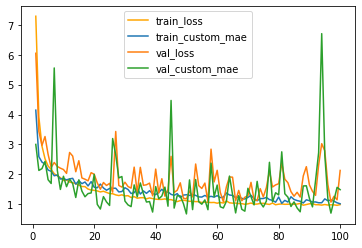

In [58]:
# Training plot without enhance
w_eH = regression_w_his
w_eHis = regression_w_history
train_loss = w_eH.history['loss']
train_mse = w_eH.history['custom_mae']
val_loss = w_eH.history['val_loss']
val_mse = w_eH.history['val_custom_mae']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'orange', label='train_loss')
plt.plot(epochs, train_mse, label='train_custom_mae')
plt.plot(epochs, val_loss, label='val_loss')
plt.plot(epochs, val_mse, label='val_custom_mae')
plt.legend()
plt.show()

---

### Classfication

In [4]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from Classfication import classfication, preprocessing

classes_num = 12 * 2
batch_size = 128
epochs = 100
lr = 0.001

images_npy = '../Datasets/images.npy'
labels_npy = '../Datasets/labels.npy'

# images = np.load(images_npy)
images = enhance_images 
labels = np.load(labels_npy)
x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=0.8)

x_train, x_test, input_shape = preprocessing(x_train, x_test)
y_train = y_train[:, 0] * 2 + (y_train[:, 1] * 2 / 60).astype('int32')
y_test = y_test[:, 0] * 2 + (y_test[:, 1] * 2 / 60).astype('int32')

y_train_trans2class = to_categorical(y_train, classes_num)
y_test_trans2class = to_categorical(y_test, classes_num)

classfication_history, classfication_his = classfication(x_train, y_train_trans2class, x_test, y_test_trans2class, batch_size, epochs, lr, classes_num, input_shape)

Epoch 1/100
113/113 [==============================] - 9s 69ms/step - loss: 9.8243 - categorical_accuracy: 0.0437 - val_loss: 6.4306 - val_categorical_accuracy: 0.0469
Epoch 2/100
113/113 [==============================] - 7s 62ms/step - loss: 5.4127 - categorical_accuracy: 0.0439 - val_loss: 4.7993 - val_categorical_accuracy: 0.0414
Epoch 3/100
113/113 [==============================] - 6s 57ms/step - loss: 4.5856 - categorical_accuracy: 0.0435 - val_loss: 4.2344 - val_categorical_accuracy: 0.0422
Epoch 4/100
113/113 [==============================] - 7s 58ms/step - loss: 4.2759 - categorical_accuracy: 0.0574 - val_loss: 4.4969 - val_categorical_accuracy: 0.0425
Epoch 5/100
113/113 [==============================] - 7s 63ms/step - loss: 3.7268 - categorical_accuracy: 0.1569 - val_loss: 4.1729 - val_categorical_accuracy: 0.0800
Epoch 6/100
113/113 [==============================] - 7s 61ms/step - loss: 3.1305 - categorical_accuracy: 0.2467 - val_loss: 3.4995 - val_categorical_accuracy:

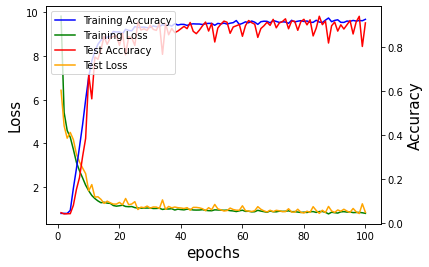

In [5]:
acc = classfication_his.history['categorical_accuracy']
loss = classfication_his.history['loss']
accVal = classfication_his.history['val_categorical_accuracy']
lossVal = classfication_his.history['val_loss']
epochs = range(1, len(loss) + 1)

# plt.title('Accuracy and Loss')
# fig = plt.figure()
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax1.set_ylabel('Loss', fontsize=15)
ax2.set_ylabel('Accuracy', fontsize=15)
ax1.set_xlabel('epochs', fontsize=15)
L1, = ax2.plot(epochs, acc, 'blue', label='Training Accuracy')
L2, = ax1.plot(epochs, loss, 'green', label='Training Loss')
L3, = ax2.plot(epochs, accVal, 'red', label='Test Accuracy')
L4, = ax1.plot(epochs, lossVal, 'orange', label='Test Loss')
plt.legend(handles = [L1, L2, L3, L4], loc = 'upper left', fontsize=10)

#### 720 categories

In [25]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from Classfication import classfication, preprocessing

classes_num = 720
batch_size = 128
epochs = 100
lr = 0.001

images_npy = '../Datasets/images.npy'
labels_npy = '../Datasets/labels.npy'

# images = np.load(images_npy)
images = enhance_images 
labels = np.load(labels_npy)
x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=0.8)

x_train, x_test, input_shape = preprocessing(x_train, x_test)
y_train = y_train[:, 0] * 60  + (y_train[:, 1]).astype('int32')
y_test = y_test[:, 0] * 60 + (y_test[:, 1]).astype('int32')

y_train_trans2class = to_categorical(y_train, classes_num)
y_test_trans2class = to_categorical(y_test, classes_num)

history, his = classfication(x_train, y_train_trans2class, x_test, y_test_trans2class, batch_size, epochs, lr, classes_num, input_shape)

Epoch 1/100
113/113 [==============================] - 7s 60ms/step - loss: 10.1763 - categorical_accuracy: 6.2500e-04 - val_loss: 7.5844 - val_categorical_accuracy: 0.0014
Epoch 2/100
113/113 [==============================] - 6s 57ms/step - loss: 7.2146 - categorical_accuracy: 0.0012 - val_loss: 6.9540 - val_categorical_accuracy: 0.0011
Epoch 3/100
113/113 [==============================] - 6s 53ms/step - loss: 6.9036 - categorical_accuracy: 0.0013 - val_loss: 6.7758 - val_categorical_accuracy: 5.5556e-04
Epoch 4/100
113/113 [==============================] - 6s 51ms/step - loss: 6.7388 - categorical_accuracy: 0.0017 - val_loss: 6.7087 - val_categorical_accuracy: 0.0011
Epoch 5/100
113/113 [==============================] - 6s 57ms/step - loss: 6.6806 - categorical_accuracy: 0.0013 - val_loss: 6.6614 - val_categorical_accuracy: 2.7778e-04
Epoch 6/100
113/113 [==============================] - 6s 56ms/step - loss: 6.6513 - categorical_accuracy: 8.3333e-04 - val_loss: 6.6506 - val_cate

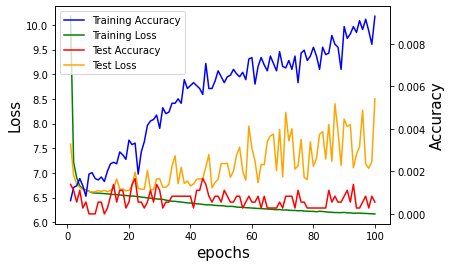

In [26]:
acc = his.history['categorical_accuracy']
loss = his.history['loss']
accVal = his.history['val_categorical_accuracy']
lossVal = his.history['val_loss']
epochs = range(1, len(loss) + 1)

# plt.title('Accuracy and Loss')
# fig = plt.figure()
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax1.set_ylabel('Loss', fontsize=15)
ax2.set_ylabel('Accuracy', fontsize=15)
ax1.set_xlabel('epochs', fontsize=15)
L1, = ax2.plot(epochs, acc, 'blue', label='Training Accuracy')
L2, = ax1.plot(epochs, loss, 'green', label='Training Loss')
L3, = ax2.plot(epochs, accVal, 'red', label='Test Accuracy')
L4, = ax1.plot(epochs, lossVal, 'orange', label='Test Loss')
plt.legend(handles = [L1, L2, L3, L4], loc = 'upper left', fontsize=10)

### Multi head


In [6]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from MultiheadModel import multi_classfication, preprocessing, minutes_transform

batch_size = 128
epochs = 100
lr = 0.001
classes_num = 12

images_npy = '../Datasets/images.npy'
labels_npy = '../Datasets/labels.npy'

# images = np.load(images_npy)
images = enhance_images 
labels = np.load(labels_npy)
x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=0.8)
x_train, x_test, input_shape = preprocessing(x_train, x_test)

hours_train = y_train[:,0]
minutes_train = y_train[:,1]
hours_test = y_test[:,0]
minutes_test = y_test[:,1]

y_train_hours = to_categorical(hours_train, classes_num)
y_train_mintues = minutes_train / 60
y_test_hours = to_categorical(hours_test, classes_num)
y_test_mintues = minutes_test  / 60
# y_train_mintues = minutes_transform(minutes_train)
# y_test_mintues = minutes_transform(minutes_test)

y_train = [y_train_hours, y_train_mintues]
y_test = [y_test_hours, y_test_mintues]

history, his = multi_classfication(x_train, y_train, x_test, y_test, batch_size, epochs, lr, classes_num, input_shape)

Epoch 1/100
113/113 [==============================] - 9s 64ms/step - loss: 11.2141 - hours_loss: 2.9044 - minutes_loss: 0.8953 - hours_categorical_accuracy: 0.0876 - hours_mse: 0.0813 - minutes_categorical_accuracy: 1.0000 - minutes_mse: 15.5539 - val_loss: 9.3857 - val_hours_loss: 2.8397 - val_minutes_loss: 1.7648 - val_hours_categorical_accuracy: 0.0867 - val_hours_mse: 0.0800 - val_minutes_categorical_accuracy: 1.0000 - val_minutes_mse: 3.2591
Epoch 2/100
113/113 [==============================] - 6s 56ms/step - loss: 6.1116 - hours_loss: 2.4667 - minutes_loss: 0.2425 - hours_categorical_accuracy: 0.1020 - hours_mse: 0.0761 - minutes_categorical_accuracy: 1.0000 - minutes_mse: 0.0874 - val_loss: 5.3190 - val_hours_loss: 2.5244 - val_minutes_loss: 0.3061 - val_hours_categorical_accuracy: 0.0861 - val_hours_mse: 0.0769 - val_minutes_categorical_accuracy: 1.0000 - val_minutes_mse: 0.1415
Epoch 3/100
113/113 [==============================] - 7s 58ms/step - loss: 4.6029 - hours_loss: 2

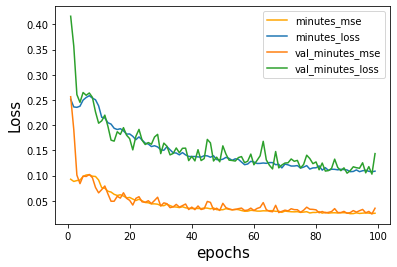

In [29]:
minutes_mse = his.history['minutes_mse'][1:]
minutes_loss = his.history['minutes_loss'][1:]
Vminutes_mse = his.history['val_minutes_mse'][1:]
Vminutes_loss = his.history['val_minutes_loss'][1:]
epochs = range(1, len(minutes_mse) + 1)
ax1 = plt.subplot()
ax1.set_ylabel('Loss', fontsize=15)
ax1.set_xlabel('epochs', fontsize=15)
ax1.plot(epochs, minutes_mse, 'orange', label='minutes_mse')
ax1.plot(epochs, minutes_loss, label='minutes_loss')
ax1.plot(epochs, Vminutes_mse, label='val_minutes_mse')
ax1.plot(epochs, Vminutes_loss, label='val_minutes_loss')
plt.legend()
plt.show()

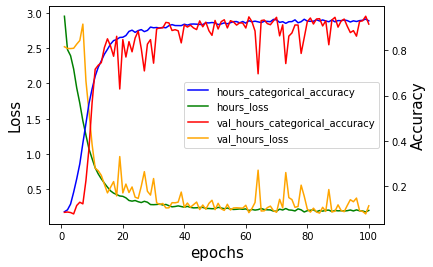

In [30]:
hours_acc = his.history['hours_categorical_accuracy']
hours_loss = his.history['hours_loss']

Vhours_acc = his.history['val_hours_categorical_accuracy']
Vhours_loss = his.history['val_hours_loss']
epochs = range(1, len(hours_loss) + 1)

# plt.title('Accuracy and Loss')
# fig = plt.figure()
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax1.set_ylabel('Loss', fontsize=15)
ax2.set_ylabel('Accuracy', fontsize=15)
ax1.set_xlabel('epochs', fontsize=15)
L1, = ax2.plot(epochs, hours_acc, 'blue', label='hours_categorical_accuracy')
L2, = ax1.plot(epochs, hours_loss, 'green', label='hours_loss')
L3, = ax2.plot(epochs, Vhours_acc, 'red', label='val_hours_categorical_accuracy')
L4, = ax1.plot(epochs, Vhours_loss, 'orange', label='val_hours_loss')
plt.legend(handles = [L1, L2, L3, L4], loc = 'right', fontsize=10)

In [9]:
pred = history.predict(x_test)

113/113 [==============================] - 1s 5ms/step


In [10]:
print("y_predict", '   ', 'y_test')
for i in range(100):
    print(np.argmax(pred[0][i]), ' ', np.argmax(y_test[0][i]))

y_predict     y_test
10   10
2   2
6   6
4   4
11   11
4   4
11   11
9   9
9   10
4   4
6   5
4   4
3   3
7   7
4   4
10   10
3   3
4   3
10   10
3   3
11   11
2   2
6   6
1   1
10   10
3   3
10   10
11   11
8   8
11   11
11   11
11   0
5   5
8   8
0   0
7   7
2   2
4   4
8   8
9   9
0   0
2   2
1   1
5   5
6   6
5   5
1   1
9   9
10   11
7   7
1   1
6   6
6   6
5   5
9   9
10   10
10   10
8   8
3   3
4   4
1   2
7   7
8   8
2   2
0   0
1   1
1   1
8   9
7   7
6   6
8   8
6   6
6   6
5   5
4   4
8   8
6   6
5   5
2   2
0   0
1   1
6   6
1   1
7   7
4   4
3   3
4   4
8   8
9   9
5   5
1   1
1   1
2   2
3   3
8   8
11   11
7   7
7   7
9   9
3   2


In [11]:
# minutes difference and average minutes difference
sum = 0
for i in range(len(pred[1])):
    sum += abs(pred[1][i] - y_test[1][i])
    print(pred[1][i] , ' ', y_test[1][i] )

sum / len(pred[1]) * 60

[0.37879896]   0.2
[0.26173303]   0.18333333333333332
[0.6454159]   0.7166666666666667
[0.599526]   0.9666666666666667
[0.43201828]   0.9
[0.44699872]   0.36666666666666664
[0.6190482]   0.6333333333333333
[0.25951606]   0.08333333333333333
[0.58381945]   0.6166666666666667
[0.78649557]   0.9
[0.6483753]   0.6333333333333333
[0.3101553]   0.35
[0.63006204]   0.8166666666666667
[0.14216071]   0.2
[0.2592197]   0.21666666666666667
[0.19377694]   0.23333333333333334
[0.42734277]   0.5333333333333333
[0.74597096]   0.9666666666666667
[0.1920359]   0.2
[0.26195815]   0.23333333333333334
[0.63455784]   0.7333333333333333
[0.523608]   0.48333333333333334
[0.677438]   0.95
[0.512159]   0.43333333333333335
[0.68419915]   0.8666666666666667
[0.3887864]   0.4
[0.74811924]   0.8333333333333334
[0.1835176]   0.2833333333333333
[0.18178007]   0.08333333333333333
[0.4656502]   0.016666666666666666
[0.806263]   0.9333333333333333
[0.34032583]   0.016666666666666666
[0.3447631]   0.08333333333333333
[0

array([6.9574857], dtype=float32)

In [33]:
pred_hours = np.array([np.argmax(pred[0][i]) for i in range(3600)])
pred_minutes = np.array([pred[1][i] for i in range(3600)])
y_test_hours = np.array([np.argmax(y_test[0][i]) for i in range(3600)])
y_test_minutes = np.array([y_test[1][i] for i in range(3600)])

In [34]:
def sincos_mse(y_true, y_pred):
    return np.sqrt((np.sum(np.square(y_true - y_pred)* [3600, 3600, 1, 1]) ) / 3601)
    
trans_pred = label_transform([pred_hours, pred_minutes])
trans_y_test = label_transform([y_test_hours, y_test_minutes])

sincos_mse(trans_pred, trans_y_test)

0.09426499409856326

### Label trans regression

In [35]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from LabelTrans_Regression import label_trans_regression, preprocessing, label_transform

batch_size = 32
epochs = 100
lr = 0.001

images_npy = '../Datasets/images.npy'
labels_npy = '../Datasets/labels.npy'

# images = np.load(images_npy)
images = enhance_images
labels = np.load(labels_npy)

# labels_trans = label_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=0.8)

y_o_train = y_train
y_o_test = y_test

y_train = label_transform(y_train)
y_test = label_transform(y_test)

x_train, x_test, input_shape = preprocessing(x_train, x_test)

label_trans_regression_history, label_trans_regression_his = label_trans_regression(x_train, y_train, x_test, y_test, batch_size, epochs, input_shape)

Epoch 1/100
450/450 [==============================] - 10s 20ms/step - loss: 15.3544 - mae: 1.2926 - val_loss: 11.3729 - val_mae: 0.6684
Epoch 2/100
450/450 [==============================] - 8s 18ms/step - loss: 8.3571 - mae: 0.6449 - val_loss: 7.5068 - val_mae: 0.5816
Epoch 3/100
450/450 [==============================] - 8s 18ms/step - loss: 7.0134 - mae: 0.5453 - val_loss: 7.8117 - val_mae: 0.6037
Epoch 4/100
450/450 [==============================] - 8s 18ms/step - loss: 5.9793 - mae: 0.4859 - val_loss: 5.4167 - val_mae: 0.4843
Epoch 5/100
450/450 [==============================] - 8s 18ms/step - loss: 4.7816 - mae: 0.4519 - val_loss: 4.4877 - val_mae: 0.4535
Epoch 6/100
450/450 [==============================] - 8s 18ms/step - loss: 4.0611 - mae: 0.4298 - val_loss: 4.5453 - val_mae: 0.4612
Epoch 7/100
450/450 [==============================] - 8s 18ms/step - loss: 3.6173 - mae: 0.4145 - val_loss: 3.8017 - val_mae: 0.4319
Epoch 8/100
450/450 [==============================] - 8s 1

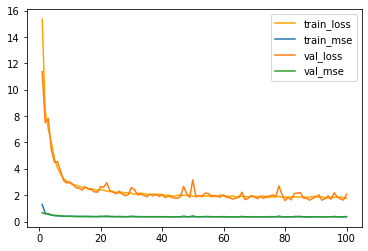

In [42]:
train_loss = label_trans_regression_his.history['loss']
train_mse = label_trans_regression_his.history['mae']
val_loss = label_trans_regression_his.history['val_loss']
val_mse = label_trans_regression_his.history['val_mae']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'orange', label='train_loss')
plt.plot(epochs, train_mse, label='train_mse')
plt.plot(epochs, val_loss, label='val_loss')
plt.plot(epochs, val_mse, label='val_mse')
plt.legend()
plt.show()

In [44]:
label_trans_pred = label_trans_regression_history.predict(x_test)

113/113 [==============================] - 1s 6ms/step


In [56]:
def sincos_mse(y_true, y_pred):
    return np.sqrt((np.sum(np.square(y_true - y_pred)* [3600, 3600, 1, 1]) ) / 3601)

In [57]:
sincos_mse(label_trans_pred, y_test)

13.448971751941423

### re-Label trans  
return real clock from sin&cos format

In [47]:
def label_transform_map(h_list, m_list):
    hours_array = np.zeros(shape=(len(h_list), 2))
    minutes_array = np.zeros(shape=(len(m_list), 2))
    for i in range(len(h_list)):
        hour = h_list[i]
        hours_array[i] = (np.sin(hour*(1/6)*np.pi),np.cos(hour*(1/6)*np.pi))

    for i in range(len(m_list)):
        minute = m_list[i]
        minutes_array[i] = (np.sin(minute * (1/3) * np.pi), np.cos(minute * (1/3)*np.pi))

    return hours_array, minutes_array

In [48]:
def distance(v1, v2):   
    dis_array = np.zeros(shape=(len(v2)))
    for i in range(len(v2)):
        dis_array[i] = float(np.sqrt(sum((v1 - v2[i])**2)))
    return dis_array

In [49]:
hours_list = np.arange(0, 12).astype('float32')
minutes_list = np.arange(0, 60).astype('float32')

h_map, m_map = label_transform_map(hours_list, minutes_list)

In [51]:
pred = label_trans_pred
hours = pred[:, 0:2]
minutes = pred[:, 2:]

def real_clock(hours, minutes):
    length = len(hours)
    result_list = np.zeros(shape=(length, 2))
    for i in range(length):
        hours_dis = distance(hours[i], h_map)
        minutes_dis = distance(minutes[i], m_map)

        h_min = np.argsort(hours_dis)[0:2]
        m_min = np.argsort(minutes_dis)[0]
        if (h_min[0] != 0) | (h_min[1] != 11):
            if m_min > 30:
                result_list[i] = (h_min[0]-1, m_min)
            else:
                result_list[i] = (h_min[0], m_min)
        else:
            if h_min[0] == 0:
                if m_min > 30:
                    result_list[i] = (11, m_min)
                else:
                    result_list[i] = (0, m_min)
            if h_min[0] == 11:
                if m_min > 30:
                    result_list[i] = (10, m_min)
                else:
                    result_list[i] = (11, m_min)
    return result_list

In [55]:
result_list = real_clock(hours, minutes)
true_result = real_clock(y_test[:, 0:2], y_test[:, 2:])

In [131]:
sum = 0
for i in range(3600):
    sum += min(abs(result_list[i, 1] - y_o_test[i, 1]), abs(60 + result_list[i, 1] - y_o_test[i, 1]))

In [132]:
sum/3600

16.92972222222222

In [119]:
for i in range(100):
    print(result_list[i], ' ', y_o_test[i])

[ 1. 31.]   [2 4]
[8. 0.]   [ 7 32]
[ 6. 10.]   [ 5 11]
[ 0. 25.]   [10 43]
[4. 1.]   [ 4 17]
[ 9. 19.]   [ 8 56]
[ 3. 33.]   [ 3 42]
[11. 25.]   [10 58]
[5. 1.]   [5 7]
[ 3. 19.]   [ 3 20]
[4. 1.]   [3 8]
[4. 1.]   [ 4 43]
[ 6. 56.]   [ 7 37]
[0. 0.]   [11 56]
[ 6. 50.]   [7 9]
[ 8. 29.]   [ 7 24]
[4. 7.]   [ 4 19]
[ 6. 37.]   [ 6 13]
[ 5. 15.]   [ 5 57]
[1. 1.]   [ 0 42]
[ 4. 49.]   [ 5 24]
[10. 36.]   [11  8]
[0. 0.]   [11 31]
[ 3. 50.]   [ 3 53]
[ 1. 13.]   [ 0 59]
[ 7. 29.]   [ 6 54]
[ 4. 50.]   [ 4 37]
[10.  1.]   [ 9 58]
[ 4. 29.]   [ 4 46]
[ 8. 56.]   [ 8 48]
[1. 0.]   [1 0]
[4. 1.]   [3 8]
[ 4. 16.]   [4 1]
[2. 1.]   [ 1 56]
[11. 58.]   [11 58]
[ 1. 50.]   [ 2 38]
[ 3. 25.]   [ 2 52]
[ 0. 50.]   [ 1 23]
[ 9. 31.]   [ 9 32]
[ 6. 50.]   [ 6 33]
[ 8. 23.]   [ 7 46]
[ 9. 19.]   [ 8 38]
[6. 0.]   [ 6 28]
[7. 0.]   [ 6 16]
[ 0. 25.]   [ 0 25]
[ 6. 49.]   [ 6 16]
[ 6. 25.]   [ 5 11]
[11.  0.]   [10 27]
[11. 25.]   [11  8]
[8. 1.]   [ 7 40]
[ 0. 40.]   [ 1 25]
[ 3. 29.]   [ 1 48]
[ 2.

---

### Other attempts

In [46]:
# two classification Multi-head

from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from MultiheadModelAlex import multi_classficationAlex, preprocessing, minutes_transform
from skimage import exposure

batch_size = 128
epochs = 100
lr = 0.001
classes_num = 30

images_npy = '../Datasets/images.npy'
labels_npy = '../Datasets/labels.npy'

images = np.load(images_npy)
enhance_images = exposure.adjust_gamma(images, 3)
images = enhance_images 
labels = np.load(labels_npy)
x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=0.8)
x_train, x_test, input_shape = preprocessing(x_train, x_test)

hours_train = y_train[:,0]
minutes_train = y_train[:,1]
hours_test = y_test[:,0]
minutes_test = y_test[:,1]

minutes_train = (minutes_train / 2).astype('int32')
minutes_test = (minutes_test / 2).astype('int32')

y_train_hours = to_categorical(hours_train, 12)
y_test_hours = to_categorical(hours_test, 12)
y_train_mintues = to_categorical(minutes_train, classes_num)
y_test_mintues = to_categorical(minutes_test, classes_num)

y_train = [y_train_mintues, y_train_hours]
y_test = [y_test_mintues, y_test_hours]

history, his = multi_classficationAlex(x_train, y_train, x_test, y_test, batch_size, epochs, lr, classes_num, input_shape)

In [2]:
# different fully connected layer

from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from MultiheadModelBeta import multi_classficationBeta, preprocessing, minutes_transform

batch_size = 128
epochs = 100
lr = 0.001
classes_num = 12

images_npy = '../Datasets/images.npy'
labels_npy = '../Datasets/labels.npy'

# images = np.load(images_npy)
images = enhance_images 
labels = np.load(labels_npy)
x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=0.8)
x_train, x_test, input_shape = preprocessing(x_train, x_test)

hours_train = y_train[:,0]
minutes_train = y_train[:,1]
hours_test = y_test[:,0]
minutes_test = y_test[:,1]

y_train_hours = to_categorical(hours_train, classes_num)
y_train_mintues = minutes_train / 60
y_test_hours = to_categorical(hours_test, classes_num)
y_test_mintues = minutes_test  / 60
# y_train_mintues = minutes_transform(minutes_train)
# y_test_mintues = minutes_transform(minutes_test)

y_train = [y_train_hours, y_train_mintues]
y_test = [y_test_hours, y_test_mintues]

history, his = multi_classfication(x_train, y_train, x_test, y_test, batch_size, epochs, lr, classes_num, input_shape)

---

### Model Structure

In [3]:
# Multi head model
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, BatchNormalization
from keras import backend
import tensorflow as tf
import keras

input = Input(shape=(150, 150, 1))

conv1 = Conv2D(32, (3, 3), 
                activation='relu', 
                kernel_regularizer='l2')(input)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
normal1 = BatchNormalization()(pool1)
drop1 = Dropout(0.25)(normal1)

conv3 = Conv2D(64, (3, 3), 
                activation='relu',
                kernel_regularizer='l2')(drop1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
normal2 = BatchNormalization()(pool2)
drop2 = Dropout(0.25)(normal2)

conv3 = Conv2D(128, (3, 3), 
                activation='relu',
                kernel_regularizer='l2')(drop2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
normal3 = BatchNormalization()(pool3)
drop3 = Dropout(0.25)(normal3)

flatten = Flatten()(drop3)
Dense1 = Dense(256,
                activation='relu',
                kernel_regularizer='l2')(flatten)
Dense2 = Dense(128,
            activation='relu',
            kernel_regularizer='l2')(Dense1)
output_class = Dense(12, activation='softmax', name='hours')(Dense2)
# Regression
output_regress = Dense(1, activation='linear', name='minutes')(Dense2)
multi_model = Model(inputs = input, outputs = [output_class, output_regress])
multi_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 148, 148, 32  320         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 74, 74, 32)   0           ['conv2d_1[0][0]']               
                                                                                              